## Choose a word and create a graph of n-grams from text data, then display it as a tree graph
Looking at the neighbours of a selected word

### Loading the text data

In [1]:
import pandas as pd
import memebox.treegraph as mtg

In [2]:
graph_data_path = './Data/graph/'
pickle_data_path = './Data/pickle/'
series_name = 'marseille'
series_name = 'LBDL'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'

In [3]:
text_data = pd.read_pickle(pickle_file)

###  Selecting documents with particular keywords

## Computing the hirarchical structure 

### Word to search for

In [4]:
# with dic of ngrams
candidat_word = "secret"
candidat_word = "retrouve"
# Number n of n-grams
n_grams = 5
print('Search for the candidat word')
dic_of_ngrams = mtg.find_ngrams_dic(candidat_word,text_data,
                                                      direction='forward',n_grams=n_grams)
#nb_occur = list_of_ngram_df_merged[0].nb_occur[0]
#print('Number of occurence of \'{}\' : {}'.format(candidat_word,nb_occur))

Search for the candidat word


In [8]:
[print(s) for s in dic_of_ngrams.keys() if 'chez' in s]

retrouve chez


[None]

In [12]:
dic_of_ngrams['retrouve chez']

[12981]

In [10]:
dic_of_ngrams

{'retrouve être aimé saison': [21336],
 'retrouve davantage côté': [28890],
 'retrouve alsace brasserie dirigée trois': [17451],
 'retrouve magnifiquement passé trappe profit': [14425],
 'retrouve ultime saison': [11],
 'retrouve scénariste problèmes': [28890],
 'retrouve position délicate trois descendantes': [28679],
 'retrouve comédien aziz': [26961],
 'retrouve repères': [11481],
 'retrouve application ios android': [29389],
 'retrouve casting premium bureau': [620],
 'retrouve frère': [25608],
 'retrouve celui interprété': [17784],
 'retrouve nord': [14533],
 'retrouve aussi systématiquement brefs flashes': [12816],
 'retrouve mis examen bien': [20991],
 'retrouve face reconnaît plus identité': [10679, 10680],
 'retrouve bureau': [234, 3336, 11918],
 'retrouve grand': [11213],
 'retrouve doté vitesse extraordinaire': [13841],
 'retrouve leurs': [223, 224, 225, 227, 230, 395],
 'retrouve part lion car monde': [14425],
 'retrouve face reconnaît': [10679, 10680],
 'retrouve cinéma ex

### Additional information: medias and time activity

In [5]:
word_selected = "légendes"

In [6]:
word_selected

'légendes'

In [7]:
medias = text_data.loc[dic_of_ngrams[word_selected]].platform.value_counts()

In [8]:
medias.to_dict()

{'Blog': 753,
 'Comment': 36,
 'Dailymotion': 35,
 'Facebook': 465,
 'Forum': 223,
 'Gplus': 2,
 'Instagram': 44,
 'Media': 2428,
 'Twitter': 7329,
 'Website': 3671,
 'Youtube': 87}

In [10]:
timeseries = text_data.loc[dic_of_ngrams[word_selected]].date.sort_values()
timeseries = timeseries.groupby(timeseries.dt.strftime('%Y-%m-%d')).size()
#df_time = timeseries.to_frame()
#df_time['Week/Year']=df_time.date.apply(lambda x: "%d/%d" % (x.week, x.year))
#timeseries = timeseries.apply(lambda x: "%d/%d/%d" % (x.year,x.month,x.day))

In [56]:
import matplotlib.pyplot as plt

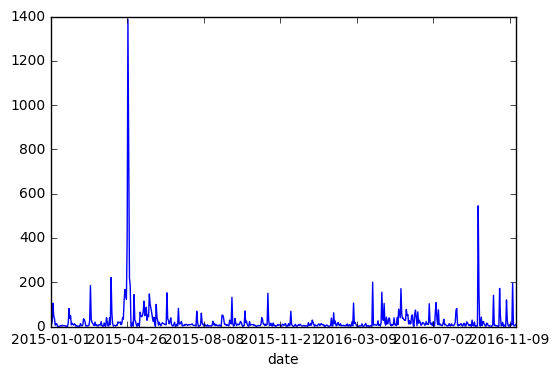

In [57]:
timeseries.plot()
plt.show()

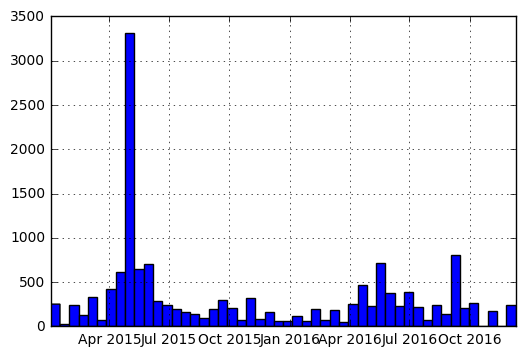

In [58]:
text_data.loc[dic_of_ngrams[word_selected]].date.hist(bins=50)
plt.show()

### Creation of a dict of information for each ngram

In [14]:
def get_ngram_infos(dic_of_ngrams,text_data):
    """ create a new dic of ngrams containing information about 
        * nb of occurences of the ngram
        * medias where the ngram appear
        * a time series of ngram appearance
        input a dic with ngrams as keys and list of indices where the ngram appear as value
    """
    info_dic_of_ngrams = {}
    for k in dic_of_ngrams.keys():
        list_k = dic_of_ngrams[k]
        info_dic_k = {}
        info_dic_k['nb_occur'] = len(list_k)
        info_dic_k['medias'] = text_data.loc[list_k].platform.value_counts().to_dict()
        timeseries = text_data.loc[list_k].date.sort_values()
        start_time = timeseries.iloc[0]
        timeseries = timeseries.groupby(timeseries.dt.strftime('%d-%m-%Y')).size()
        info_dic_k['timeseries'] = timeseries.to_dict()
        info_dic_k['start_time'] = start_time.strftime('%d-%m-%Y')
        info_dic_of_ngrams[k]=info_dic_k
    return info_dic_of_ngrams


In [15]:
info_dic_of_ngrams = get_ngram_infos(dic_of_ngrams,text_data)

In [16]:
info_dic_of_ngrams[word_selected]['nb_occur']

15073

In [17]:
mediastmp = info_dic_of_ngrams[word_selected]['medias']
mediastmp

{'Blog': 753,
 'Comment': 36,
 'Dailymotion': 35,
 'Facebook': 465,
 'Forum': 223,
 'Gplus': 2,
 'Instagram': 44,
 'Media': 2428,
 'Twitter': 7329,
 'Website': 3671,
 'Youtube': 87}

In [18]:
# find the media with the maximal value
main_media = max(mediastmp, key=lambda key: mediastmp[key])

In [19]:
main_media,mediastmp[main_media]

('Twitter', 7329)

In [20]:
info_dic_of_ngrams[word_selected]['start_time']

'01-01-2015'

### Creating the graph

In [19]:
G,root_id = mtg.createTreeGraph_fromdic(info_dic_of_ngrams,candidat_word,threshold=35)

Create the graph and add the root node 'légendes'.
Add children nodes from the n-grams dataset.


In [15]:
G.size()

150

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

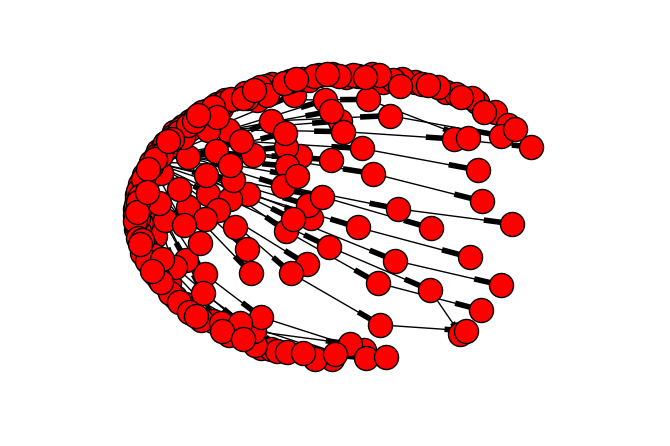

In [71]:
nx.draw_spring(G)
plt.show()

In [72]:
print(G.size())
#print(G.in_degree())

224


### Properties of the edges

In [73]:
## OPTIONAL

## Extracting the edge information
#sum_weight = 0
#n_edges = 0
#for u,v,a in G.edges(data=True):
#    sum_weight+=a['weight']
#    n_edges+=1
#average_weight = sum_weight*1.0/n_edges

## Node properties: degree and centrality
#degreeDic = G.degree(weight='weight')
#nx.set_node_attributes(G,'degree',degreeDic)
#bcDic = nx.betweenness_centrality(G)
#nx.set_node_attributes(G,'bCentrality',bcDic)

### Saving the graph

In [80]:
# Write the graph to a json file
json_filename = "treegraph"+series_name+".json"
from networkx.readwrite import json_graph
datag = json_graph.tree_data(G,root=root_id)
import json
s = json.dumps(datag)
#datag['links'] = [
#        {
#            'source': datag['nodes'][link['source']]['id'],
#            'target': datag['nodes'][link['target']]['id']
#        }
#        for link in datag['links']]
s = json.dumps(datag)
with open("./viz/"+json_filename, "w") as f:
    f.write(s)

### Open a web page for visualization

In [19]:
# run a websever in the folder where the json file has been saved
# python3 -m http.server --bind 127.0.0.1 8008

import webbrowser
url = 'http://localhost:8008/treegraphmeme.html'+'?'+'file='+json_filename
#webbrowser.open_new_tab(url)
webbrowser.open_new(url)

True

In [ ]:
G.edges(data='weight')

Deprecated

In [ ]:
print('Add children nodes in the {}-grams dataset.'.format(n_grams))
ngram_df = list_of_ngram_df_merged[n_grams-1]
for idx,row in ngram_df.iterrows():
    word_list = row.ngram.split()
    #print(row.ngram)
    for idx,word in enumerate(word_list):
        if idx == 0:
            grand_parent = ''
        else:
            parent_word = word_list[idx-1]
            word_id = word+parent_word+str(idx)
            if G.has_node(word_id):
                G.node[word_id]['occur'] += 1
                #nx.set_node_attributes(G, 'occur', G.node[word_id]['occur']+1)
            else:
                G.add_node(word_id,name=word, occur=1)
            parent_id = parent_word+grand_parent+str(idx-1)
            if G.has_edge(parent_id,word_id):
                # we added this one before, just increase the weight by one
                G[parent_id][word_id]['weight'] += 1
            else:
                # new edge. add with weight=1
                G.add_edge(parent_id, word_id, weight=1)
            grand_parent = parent_word
            if idx == len(word_list)-1:
                G.node[word_id]['occur'] = row.nb_occur

In [ ]:
clusterDic

In [ ]:
neighbour_data1,df_texts_subset1 = top_neighbours('peau',df_texts_list,direction='forward',top_n=10)
print(neighbour_data1.head(1))
neighbour_data2,df_texts_subset2 = top_neighbours(neighbour_data1.head(1).word[0],df_texts_subset1,direction='forward',top_n=10)
print(neighbour_data2.head(1))
neighbour_data3,df_texts_subset3 = top_neighbours(neighbour_data2.head(1).word[0],df_texts_subset2,direction='forward',top_n=10)

#neighbour_data2,texts_subset2 = top_neighbours(neighbour_data.head(1).word[0],texts_subset1,direction='forward',top_n=10)


In [ ]:
df_texts_subset2.text.loc[11060]

In [ ]:
neighbour_data1,texts_subset1 = top_neighbours('égalité',text_data.filtered_text,direction='forward',top_n=10)
print(neighbour_data1.head(1))
neighbour_data2,texts_subset2 = top_neighbours(neighbour_data1.head(1).word[0],texts_subset1,direction='forward',top_n=10)
print(neighbour_data2.head(1))
neighbour_data3,texts_subset3 = top_neighbours(neighbour_data2.head(1).word[0],texts_subset2,direction='forward',top_n=10)


In [ ]:
texts_subset3